# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [6]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.2.2 matplotlib==3.8.0 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [7]:
import warnings
warnings.filterwarnings("ignore")

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [8]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/My Drive/foodhub_order.csv')

In [10]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [11]:
# Write your code here

rows, cols = df.shape
print("Q1:", rows, "rows and", cols, "columns")

Q1: 1898 rows and 9 columns


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [12]:
# Write your code here
print("\nQ2: Data types:\n", df.dtypes)


Q2: Data types:
 order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
missing_values = df.isnull().sum()
print("\nQ3: Missing values:\n", missing_values)

# Handle missing values in 'rating' column, replacing with "Not given" if missing
df['rating'].fillna("Not given", inplace=True)
missing_values = df.isnull().sum()
print("\nMissing values after treatment:")
print(missing_values)




Q3: Missing values:
 order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

Missing values after treatment:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
print("Statistical summary of the dataset:")
print(df.describe())


min_prep = df['food_preparation_time'].min()
avg_prep = df['food_preparation_time'].mean()
max_prep = df['food_preparation_time'].max()
print(f"\nQ4: Min: {min_prep}, Avg: {avg_prep:.2f}, Max: {max_prep}")

Statistical summary of the dataset:
           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  

Q4: Min: 20, Avg: 27.37, Max: 35


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
not_rated = df[df['rating'] == 'Not given'].shape[0]
print(f"\nQ5: Orders not rated: {not_rated}")


Q5: Orders not rated: 736


#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

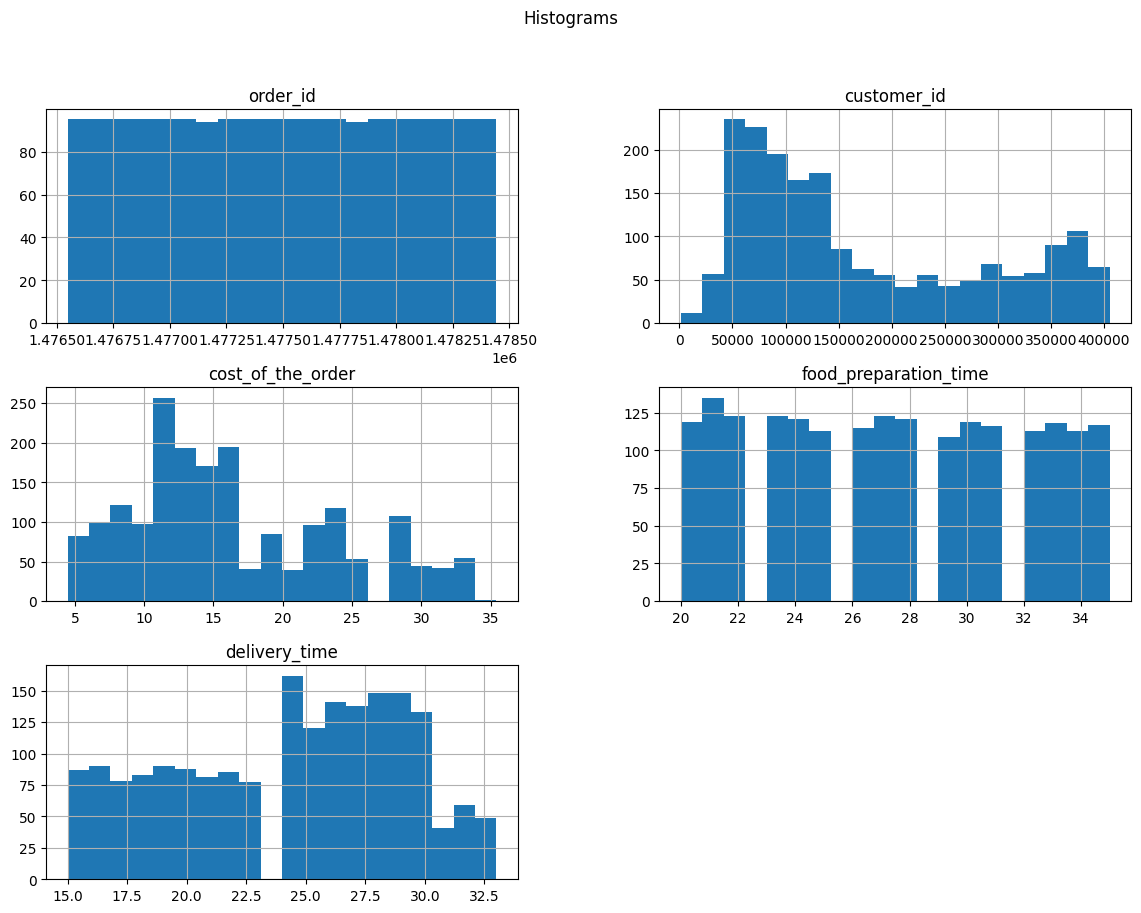

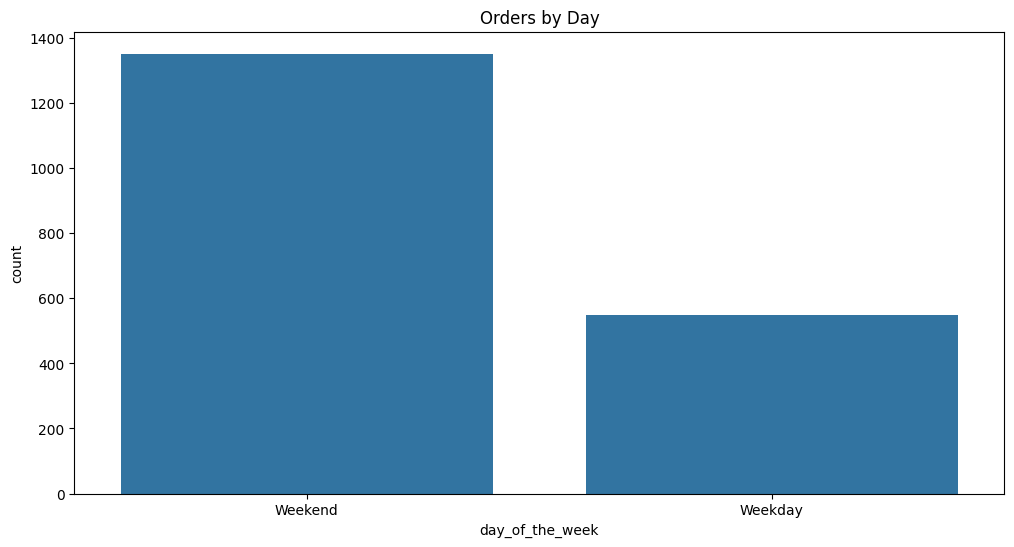

In [ ]:
# Write the code here

df.hist(bins=20, figsize=(14, 10))
plt.suptitle("Histograms")
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='day_of_the_week')
plt.title('Orders by Day')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here

top_restaurants = df['restaurant_name'].value_counts().head(5)
print("\nQ7: Top 5 restaurants:\n", top_restaurants)


Q7: Top 5 restaurants:
 restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here

popular_cuisine = df[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().idxmax()
print("\nQ8: Most popular weekend cuisine:", popular_cuisine)


Q8: Most popular weekend cuisine: American


#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here

pct_above_20 = (df[df['cost_of_the_order'] > 20].shape[0] / df.shape[0]) * 100
print(f"\nQ9: {pct_above_20:.2f}% of orders cost more than $20")


Q9: 29.24% of orders cost more than $20


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here

mean_delivery = df['delivery_time'].mean()
print(f"\nQ10: Mean delivery time: {mean_delivery:.2f} minutes")


Q10: Mean delivery time: 24.16 minutes


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here

top_customers = df['customer_id'].value_counts().head(3)
print("\nQ11: Top 3 frequent customers:\n", top_customers)


Q11: Top 3 frequent customers:
 customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


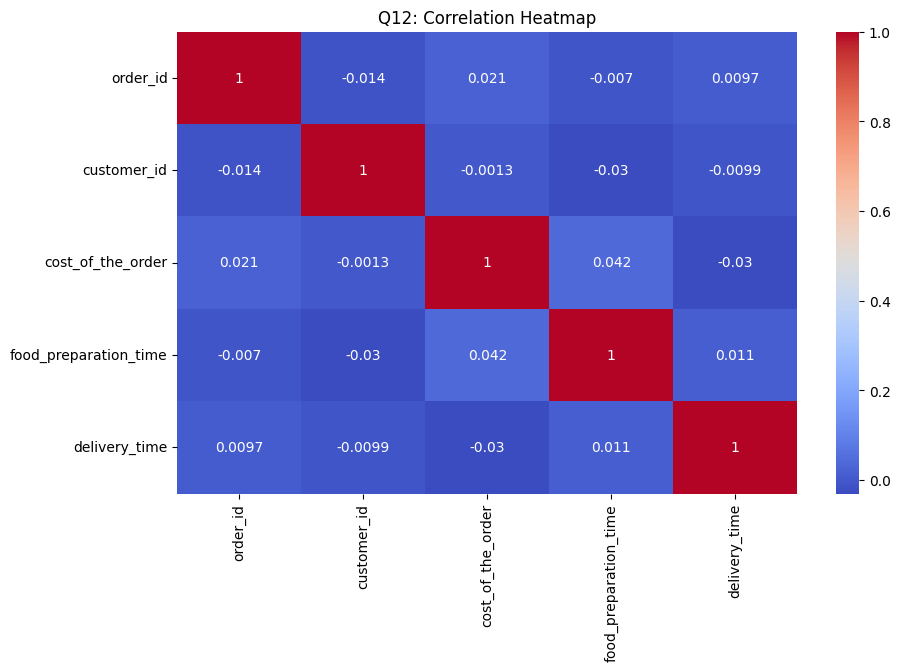

In [ ]:
# Write the code here

plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title("Q12: Correlation Heatmap")
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here

df['rating_clean'] = pd.to_numeric(df['rating'], errors='coerce')
grouped_rating = df.groupby('restaurant_name')['rating_clean'].agg(['count', 'mean'])
eligible_restaurants = grouped_rating[(grouped_rating['count'] > 50) & (grouped_rating['mean'] > 4)]
print("\nQ13: Restaurants for promotion:\n", eligible_restaurants)


Q13: Restaurants for promotion:
                            count      mean
restaurant_name                           
Blue Ribbon Fried Chicken     64  4.328125
Blue Ribbon Sushi             73  4.219178
Shake Shack                  133  4.278195
The Meatball Shop             84  4.511905


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

def calc_commission(x):
    if x > 20:
        return 0.25 * x
    elif x > 5:
        return 0.15 * x
    return 0

df['commission'] = df['cost_of_the_order'].apply(calc_commission)
revenue = df['commission'].sum()
print(f"\nQ14: Net revenue generated: ${revenue:.2f}")


Q14: Net revenue generated: $6166.30


#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

df['total_time'] = df['food_preparation_time'] + df['delivery_time']
over_60_pct = (df[df['total_time'] > 60].shape[0] / df.shape[0]) * 100
print(f"\nQ15: {over_60_pct:.2f}% of orders took over 60 minutes")


Q15: 10.54% of orders took over 60 minutes


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

mean_delivery_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()
print("\nQ16: Mean delivery time by weekday/weekend:\n", mean_delivery_by_day)


Q16: Mean delivery time by weekday/weekend:
 day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:


1. Customer Ratings
Issue: Approximately 39% of orders (736 out of 1898) are marked as "Not given" in the rating column.

2. Cuisine Popularity
Observation: American cuisine is the most frequently ordered type on weekends.

3. Delivery Time Optimization
Finding: Around 10.5% of orders take over 60 minutes (food preparation + delivery).

Additional Insight: Weekday deliveries are slower (28.3 min) compared to weekends (22.5 min).

4. Customer Retention
Finding: The top 3 most frequent customers placed 13, 10, and 9 orders, respectively.

5. Revenue Growth from High-Value Orders
Observation: 29% of orders cost more than $20, generating 25% commission.

Total Commission Revenue: Approximately $6,166.

6. Restaurant Partner Strategy
Insight: Only 4 restaurants meet the criteria for promotional offers (>50 ratings and avg. rating > 4).



### Recommendations:

- American cuisine is the most ordered on weekends. Invest in promoting these during weekends.
- Focus marketing efforts on top customers (IDs: [52832, 47440, 83287])
- Encourage more ratings; a large number are 'Not given'. Incentivize feedback.
- Promote high-rated restaurants with frequent orders for loyalty partnerships.


| Area                | Action                                                   |
| ------------------- | -------------------------------------------------------- |
| Ratings             | Incentivize customer feedback                            |
| Cuisine Focus       | Boost American cuisine promotions on weekends            |
| Time Management     | Investigate high-delivery-time orders & weekday delays   |
| Customer Retention  | Reward top 3 frequent customers                          |
| Revenue Growth      | Drive higher-value orders through bundling and upselling |
| Restaurant Strategy | Collaborate with partners to increase ratings and volume |


---